# Look at worst performing Sage (OpenFF-2.0.0) parameters

In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import re
import numpy as np
import yaml
import pint
unit_registry = pint.UnitRegistry()

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from  plotly import colors

import pandas as pd

from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D, IPythonConsole

rdDepictor.SetPreferCoordGen(True)
from IPython.display import SVG
import rdkit

from svgutils import transform as sg

from IPython.core.display import HTML
from svgutils import transform as sg

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from ipywidgets import interact

import benchmarkpl
path = benchmarkpl.__path__[0]
from benchmarkpl import drawing

In [2]:
all_edges = pd.read_csv('../01_inspect/01f_all_edges_all_ffs_parameters.csv')
all_edges.index=all_edges.iloc[:,0]
all_edges.head()

,Unnamed: 0,DDG_Consensus_OpenFF_GAFF2,DDG_Consensus_OpenFF_GAFF2_cGenFF,DDG_Consensus_all,DDG_Exp.,DDG_GAFF2,DDG_OPLS3e,DDG_OpenFF-1.0,DDG_OpenFF-1.0_converged,DDG_OpenFF-1.2,...,openff-2.0.0.offxml_t86,openff-2.0.0.offxml_t9,openff-2.0.0.offxml_t90,openff-2.0.0.offxml_t93,openff-2.0.0.offxml_t94,openff-2.0.0.offxml_t95,openff-2.0.0.offxml_t96,openff-2.0.0.offxml_t97,target,unit
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
jnk1_edge_17124-1_18631-1,jnk1_edge_17124-1_18631-1,1.044876,0.906112,1.482263,0.26,1.331262,1.517686,1.190000,1.190000,NaN,...,False,False,False,False,False,True,False,False,jnk1,kilocalories / mole
jnk1_edge_17124-1_18634-1,jnk1_edge_17124-1_18634-1,0.598604,0.522556,0.468413,-0.33,0.499522,0.583174,0.580000,0.580000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18624-1,jnk1_edge_18626-1_18624-1,0.996033,0.689516,0.826727,0.38,1.125717,1.073136,0.556667,0.556667,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18625-1,jnk1_edge_18626-1_18625-1,0.614321,0.381663,0.913932,0.77,0.707457,1.445985,-0.030000,-0.030000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18627-1,jnk1_edge_18626-1_18627-1,0.454101,0.369656,0.265940,0.39,0.432600,0.396750,0.140000,0.140000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole


In [3]:
identifiers = [idx[4:] for idx in all_edges.columns if idx.startswith("DDG")]
identifiers

['Consensus_OpenFF_GAFF2',
 'Consensus_OpenFF_GAFF2_cGenFF',
 'Consensus_all',
 'Exp.',
 'GAFF2',
 'OPLS3e',
 'OpenFF-1.0',
 'OpenFF-1.0_converged',
 'OpenFF-1.2',
 'OpenFF-1.2_converged',
 'OpenFF-2.0',
 'OpenFF-2.0_converged',
 'cGenFF']

In [4]:
def make_html(edges_df):
    columns = ['Perturbation', 'target', 'ligandA', 'ligandB']
    for i, idx in enumerate(['Exp.', 'OpenFF-1.0_converged', 'OpenFF-2.0_converged']):
        edges_df.loc[:,f'DDG {idx}'] = [
            f'{np.round(row[f"DDG_{idx}"], 1)} ({np.round(row[f"dDDG_{idx}"], 1)})' 
            for i, row in edges_df.iterrows()
        ] 
        columns.append(f'DDG {idx}')
    for i, row in edges_df.iterrows():
        parameters = []
        for p, c in row.iteritems():
            if re.match("^[abtin][0-9]*$", p) and c:
                print(c)
                parameters.append(p)
        edges_df.loc[i, "Parameters"] = ",".join(parameters)
    columns.append("diff")
    columns.append("Parameters")
    edges_df = edges_df[columns]
    edges_df.reset_index(inplace=True, drop=True)
    html = edges_df.to_html(escape=False, col_space='400px', float_format=lambda x: f'{x:.1f}')
    return html

# HTML(make_html(improved_edges))

In [5]:
all_edges_pert = all_edges
#drop all nonconverged edges
all_edges_pert.drop([c for c in all_edges_pert.columns if c.startswith("openff-1.0.0.offxml")], axis=1, inplace=True)
all_edges_pert.rename({c: c.split("_")[1] for c in all_edges_pert.columns if c.startswith("openff-2.0.0.offxml")}, axis=1, inplace=True)
all_edges.head()

,Unnamed: 0,DDG_Consensus_OpenFF_GAFF2,DDG_Consensus_OpenFF_GAFF2_cGenFF,DDG_Consensus_all,DDG_Exp.,DDG_GAFF2,DDG_OPLS3e,DDG_OpenFF-1.0,DDG_OpenFF-1.0_converged,DDG_OpenFF-1.2,...,t86,t9,t90,t93,t94,t95,t96,t97,target,unit
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
jnk1_edge_17124-1_18631-1,jnk1_edge_17124-1_18631-1,1.044876,0.906112,1.482263,0.26,1.331262,1.517686,1.190000,1.190000,NaN,...,False,False,False,False,False,True,False,False,jnk1,kilocalories / mole
jnk1_edge_17124-1_18634-1,jnk1_edge_17124-1_18634-1,0.598604,0.522556,0.468413,-0.33,0.499522,0.583174,0.580000,0.580000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18624-1,jnk1_edge_18626-1_18624-1,0.996033,0.689516,0.826727,0.38,1.125717,1.073136,0.556667,0.556667,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18625-1,jnk1_edge_18626-1_18625-1,0.614321,0.381663,0.913932,0.77,0.707457,1.445985,-0.030000,-0.030000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole
jnk1_edge_18626-1_18627-1,jnk1_edge_18626-1_18627-1,0.454101,0.369656,0.265940,0.39,0.432600,0.396750,0.140000,0.140000,NaN,...,False,False,False,False,False,False,False,False,jnk1,kilocalories / mole


## Correlation between parameters

In [6]:
para = all_edges_pert[[x  for x in all_edges_pert.columns if re.match("^[abtin][0-9]*$", x)]]

In [7]:
from sklearn import metrics
corr = para.corr(method=metrics.matthews_corrcoef)

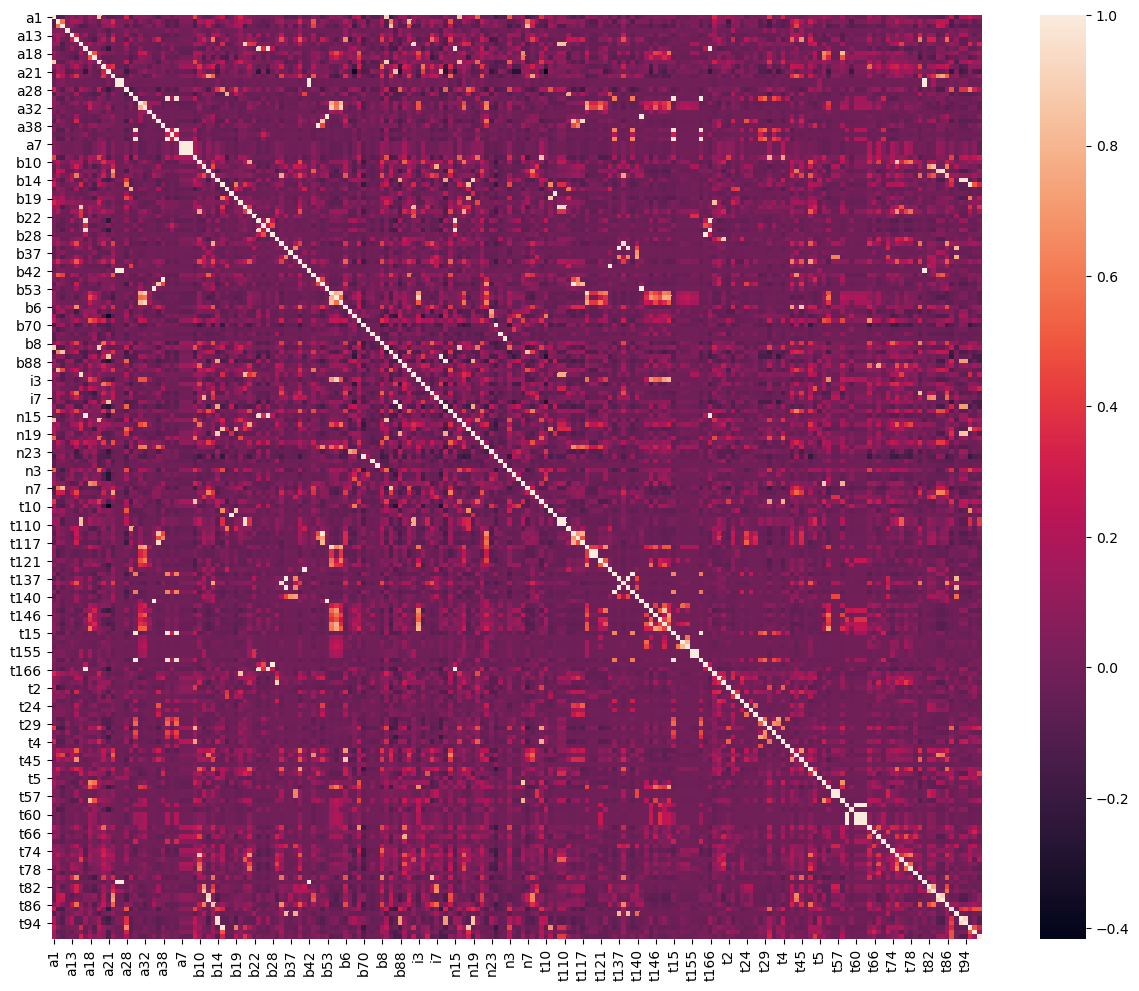

In [8]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.savefig("03f_parameter_correlation.png", bbox_inches="tight")

## Calculate difference and significance between parameters

In [9]:
n_boot=1000
ci=0.95
l = []
print(all_edges_pert.shape)
ind = ~all_edges_pert[["abserror_OpenFF-2.0_converged"]].isna().any(axis=1)
all_edges_pert =  all_edges_pert[ind.values]
print(all_edges_pert.shape)
for p in all_edges_pert.columns:
    if not re.match('^[batin][0-9]*$', p):
        continue
    else:
        s = all_edges_pert.loc[all_edges_pert[p]]
        if s.shape[0] > 3:
            size = s.shape[0]
            ntargets = len(s.target.unique())
            rmse_off2 = np.sqrt(np.sum(s["abserror_OpenFF-2.0_converged"]**2)/size)
            dist_rmse_off2 = []
            for i in range(n_boot):
                ind = np.random.choice(size, size, replace=True)
                ro2 = np.sqrt(np.sum(s["abserror_OpenFF-2.0_converged"][ind]**2)/size)
                dist_rmse_off2.append(ro2)
            dist_rmse_off2 = np.sort(dist_rmse_off2)
            low_frac = (1-ci)/2.0
            high_frac = 1 - low_frac
            signif=True
            l.append([p, 
                      "OpenFF-2.0", 
                      rmse_off2, 
                      np.mean(dist_rmse_off2),
                      np.std(dist_rmse_off2),
                    dist_rmse_off2[int(np.floor(n_boot*low_frac))],
                    dist_rmse_off2[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size,
                      ntargets
                      ])
ddf = pd.DataFrame(l, columns=["Parameter", "Forcefield", "RMSE", "Mean", "std", "low", 'high', "signif", "size","ntargets"])
ddf

(1128, 260)
(850, 260)


,Parameter,Forcefield,RMSE,Mean,std,low,high,signif,size,ntargets
0,a1,OpenFF-2.0,1.383507,1.385551,0.051964,1.289332,1.486838,True,654,22
1,a10,OpenFF-2.0,1.399950,1.398336,0.053024,1.296046,1.508834,True,641,21
2,a11,OpenFF-2.0,1.309245,1.307929,0.049134,1.210879,1.401328,True,454,21
3,a12,OpenFF-2.0,0.324949,0.299620,0.119037,0.074536,0.515666,True,4,1
4,a13,OpenFF-2.0,1.837493,1.828823,0.177610,1.483600,2.176240,True,62,5
...,...,...,...,...,...,...,...,...,...,...
180,t93,OpenFF-2.0,1.650987,1.641071,0.148916,1.353190,1.947277,True,103,10
181,t94,OpenFF-2.0,1.600075,1.584153,0.148631,1.292665,1.870827,True,104,8
182,t95,OpenFF-2.0,1.348158,1.346926,0.075997,1.199089,1.494483,True,237,19
183,t96,OpenFF-2.0,1.069483,1.066302,0.089782,0.904211,1.252239,True,81,10


### Calculate overall results

In [10]:
s = all_edges_pert
size = s.shape[0]
rmse_off1 = np.sqrt(np.sum(s["abserror_OpenFF-1.0_converged"]**2)/size)
rmse_off2 = np.sqrt(np.sum(s["abserror_OpenFF-2.0_converged"]**2)/size)
diff = rmse_off2 - rmse_off1
dist_rmse_off1 = []
dist_rmse_off2 = []
dist_diff = []
for i in range(n_boot):
    ind = np.random.choice(size, size, replace=True)
    ro1 = np.sqrt(np.sum(s["abserror_OpenFF-1.0_converged"][ind]**2)/size)
    ro2 = np.sqrt(np.sum(s["abserror_OpenFF-2.0_converged"][ind]**2)/size)
    dist_rmse_off1.append(ro1)
    dist_rmse_off2.append(ro2)
    dist_diff.append(ro2-ro1)
dist_rmse_off1 = np.sort(dist_rmse_off1)
dist_rmse_off1 = np.sort(dist_rmse_off2)
dist_diff = np.sort(dist_diff)
low_frac = (1-ci)/2.0
high_frac = 1 - low_frac
signif = False
if dist_diff[int(np.floor(n_boot*low_frac))] > 0 and \
        dist_diff[int(np.ceil(n_boot*high_frac))] > 0:
    signif = True
if dist_diff[int(np.floor(n_boot*low_frac))] < 0 and \
        dist_diff[int(np.ceil(n_boot*high_frac))] < 0:
    signif = True
all_list = []
all_list.append(["all", 
                      "OpenFF-1.0", 
                      rmse_off1, 
                      np.mean(dist_rmse_off1),
                      np.std(dist_rmse_off1),
                    dist_rmse_off1[int(np.floor(n_boot*low_frac))],
                    dist_rmse_off1[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size
                      ])
all_list.append(["all", 
                      "OpenFF-2.0", 
                      rmse_off2, 
                      np.mean(dist_rmse_off2),
                      np.std(dist_rmse_off2),
                    dist_rmse_off2[int(np.floor(n_boot*low_frac))],
                    dist_rmse_off2[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size
                      ])
all_list.append(["all", 
                      "Diff", 
                      diff, 
                      np.mean(dist_diff),
                      np.std(dist_diff),
                    dist_diff[int(np.floor(n_boot*low_frac))],
                    dist_diff[int(np.ceil(n_boot*high_frac))],
                      signif,
                      size
                      ])
all_list

[['all',
  'OpenFF-1.0',
  1.312113258302948,
  1.3489219730637838,
  0.04353401386830686,
  1.2677768097010158,
  1.4369730258860753,
  False,
  850],
 ['all',
  'OpenFF-2.0',
  1.3506182559119413,
  1.3489219730637838,
  0.04353401386830686,
  1.3774933566854026,
  1.4036821698614428,
  False,
  850],
 ['all',
  'Diff',
  0.038504997608993285,
  0.03932267621982602,
  0.049029761192042866,
  -0.049339177383032284,
  0.14176186154732284,
  False,
  850]]

### get the 30 worst parameters

In [11]:
to_plot = ddf.sort_values(by="RMSE", ascending=False)
to_plot.loc[to_plot["ntargets"]<2,"hatch"]="xx"
to_plot.loc[(to_plot["ntargets"]>=2) & (to_plot["ntargets"]<4),"hatch"]="//"
to_plot.loc[to_plot["ntargets"]>=4,"hatch"]=''
to_plot = to_plot.iloc[:30]
to_plot

,Parameter,Forcefield,RMSE,Mean,std,low,high,signif,size,ntargets,hatch
160,t6,OpenFF-2.0,2.547863,2.426893,0.669171,1.027619,3.622000,True,9,1,xx
98,n5,OpenFF-2.0,2.464349,2.430540,0.303681,1.817880,3.011434,True,35,4,
54,b51,OpenFF-2.0,1.981593,1.954806,0.349241,1.284814,2.667703,True,16,5,
22,a38,OpenFF-2.0,1.981593,1.947917,0.366942,1.228485,2.655955,True,16,5,
127,t145,OpenFF-2.0,1.928801,1.912382,0.281892,1.375678,2.461848,True,26,4,
155,t48,OpenFF-2.0,1.906627,1.885224,0.305464,1.296364,2.463457,True,26,3,//
130,t148,OpenFF-2.0,1.892016,1.880710,0.250754,1.400326,2.391025,True,30,5,
4,a13,OpenFF-2.0,1.837493,1.828823,0.177610,1.483600,2.176240,True,62,5,
41,b22,OpenFF-2.0,1.819663,1.718011,0.594842,0.813650,2.833963,True,10,2,//
42,b24,OpenFF-2.0,1.791028,1.777611,0.163152,1.473165,2.101000,True,68,9,


### Redo correlation with parameters which change significantly

In [12]:
corr_sig = corr.loc[to_plot["Parameter"].unique(),to_plot["Parameter"].unique()]

In [13]:
corr_sig[corr_sig < 0.0] = 0.0

In [14]:
from sklearn import cluster
clustering = cluster.SpectralClustering(n_clusters=15, affinity='precomputed').fit(corr_sig)
clustering.labels_

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([12, 14,  3,  3, 10,  0, 10,  7,  5,  2, 14,  1,  2, 14, 10,  0,  8,
        8,  4,  2,  2,  2, 10, 13, 11, 11, 11,  6,  9,  0], dtype=int32)

In [15]:
cl = pd.DataFrame([[x, y] for x, y in zip(corr_sig.index, clustering.labels_)]).sort_values(by=0)
d = {}
for i in range(cl[1].max()+1):
    for j, row in cl.iterrows():
        if row[1] not in d:
            print(row[1], i)
            d[row[1]] = i
            break

for j, row in cl.iterrows():
    cl.loc[j,1] = d[row[1]]
cl.sort_values(by=1, inplace=True)
d, cl

7 0
2 1
3 2
11 3
0 4
5 5
1 6
10 7
14 8
8 9
9 10
13 11
12 12
4 13
6 14


({7: 0,
  2: 1,
  3: 2,
  11: 3,
  0: 4,
  5: 5,
  1: 6,
  10: 7,
  14: 8,
  8: 9,
  9: 10,
  13: 11,
  12: 12,
  4: 13,
  6: 14},
        0   1
 7    a13   0
 21   a16   1
 19  t166   1
 20   n15   1
 12   b27   1
 9    b24   1
 2    b51   2
 3    a38   2
 25    a9   3
 24    a8   3
 26    a7   3
 5    t48   4
 15    i2   4
 29   b20   4
 8    b22   5
 11   b37   6
 14   b57   7
 22    i3   7
 6   t148   7
 4   t145   7
 13   t10   8
 10   b69   8
 1     n5   8
 16   b74   9
 17   n26   9
 28    n4  10
 23   t18  11
 0     t6  12
 18   t69  13
 27   t93  14)

In [16]:
corr_sig = corr_sig.loc[cl[0],cl[0]]

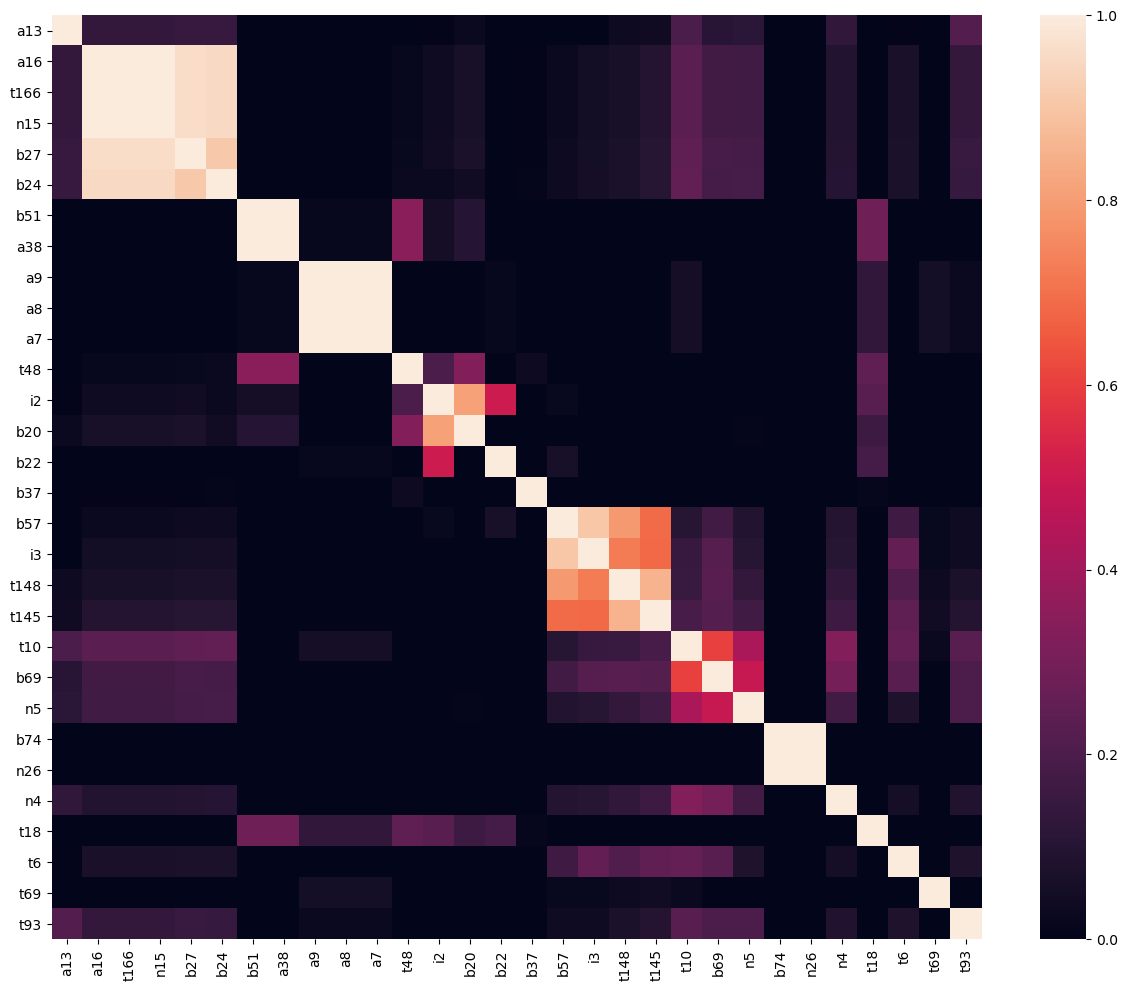

In [17]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(corr_sig)
plt.savefig("03f_parameter_correlation_worst.png", bbox_inches="tight")

In [18]:
parameter_change = pd.read_csv("../01_inspect/01d_off_parameter_changes.csv")
parameter_change.index = parameter_change.id
for nc in range(15):
    paras = cl[cl[1]==nc][0].values
    edges = all_edges_pert
    for p in paras:
        edges = edges[edges[p]]
    print(nc, edges.shape[0], paras, parameter_change.loc[paras, "smirks"].values)
    for i, e in edges.iloc[:10].iterrows():
        svg = drawing.create_perturbation_visualization(e)#, redraw=True)
        fig = sg.fromstring(svg)
        text = f"DDG(EXP)={e['DDG_Exp.']:.1f};DDG(OFF2)={e['DDG_OpenFF-2.0_converged']:.1f}"  
        label = sg.TextElement(300, 35, f'{text}', size=15, 
                   font='sans-serif', anchor='middle', color='black')
        fig.append(label) 
        img = fig.to_str().decode("utf-8")
        with open(f"03f_cluster_worst_{nc}_{i}.svg", 'w') as file:
            file.write(img)

0 62 ['a13'] ['[*;r6:1]~;@[*;r5:2]~;@[*;r5;x2:3]']
1 62 ['a16' 't166' 'n15' 'b27' 'b24'] ['[*:1]~[#6X2:2]~[*:3]' '[*:1]~[*:2]-[*:3]#[*:4]' '[#6X2:1]'
 '[#6:1]#[#7:2]' '[#6X2:1]-[#6:2]']
2 16 ['b51' 'a38'] ['[#16X2,#16X1-1,#16X3+1:1]-[#6X4:2]' '[#6X3:1]-[#16X2:2]-[#6X4:3]']
3 16 ['a9' 'a8' 'a7'] ['[!#1:1]-[#6r4:2]-;!@[#1:3]' '[!#1:1]-[#6r4:2]-;!@[!#1:3]'
 '[#6r4:1]-;@[#6r4:2]-;@[#6r4:3]']
4 4 ['t48' 'i2' 'b20'] ['[#6X3:1]=[#6X3:2]-[#6X3:3]=[#8X1:4]' '[*:1]~[#6X3:2](~[#8X1:3])~[#8:4]'
 '[#6X3:1](=[#8X1])-[#8X2H0:2]']
5 10 ['b22'] ['[#6X3:1](~[#8X1])~[#8X1:2]']
6 6 ['b37'] ['[#7:1]:[#7:2]']
7 25 ['b57' 'i3' 't148' 't145'] ['[#16X4,#16X3:1]~[#7:2]'
 '[*:1]~[#7X3$(*~[#15,#16](!-[*])):2](~[*:3])~[*:4]'
 '[#8X1:1]~[#16X4,#16X3+0:2]-[#7X4,#7X3:3]-[#1:4]'
 '[#6X3:1]-[#16X4,#16X3+0:2]-[#7X4,#7X3:3]-[#1:4]']
8 16 ['t10' 'b69' 'n5'] ['[#1:1]-[#6X4:2]-[#6X4:3]-[#9:4]' '[#6X4:1]-[#9:2]'
 '[#1:1]-[#6X4](-[#7,#8,#9,#16,#17,#35])(-[#7,#8,#9,#16,#17,#35])-[#7,#8,#9,#16,#17,#35]']
9 5 ['b74' 'n26'] ['[#6

In [19]:
order = [to_plot[to_plot["Parameter"]==p]["Parameter"].iloc[0] for p in cl[0]]

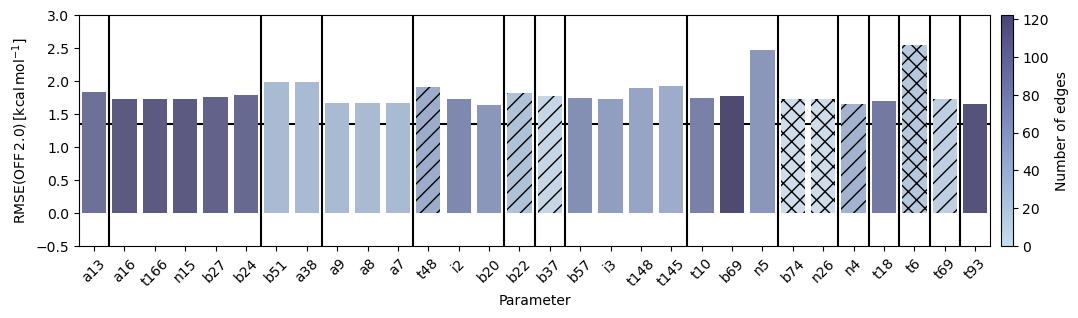

In [20]:
fig = plt.figure(figsize=(14,3))
norm = plt.Normalize(0, to_plot["size"].max())
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(start=.2, rot=-.2, dark=.3, as_cmap=True), norm=norm)
sm.set_array([])
bars = sns.barplot(x="Parameter", 
            y="RMSE", 
            data=to_plot, 
            hue="size", 
            palette="ch:start=.2,rot=-.2,dark=.3",
            order=order,
            hatch='',
           dodge=False)
ax = plt.gcf().get_axes()
ax[0].axhline(y=rmse_off2, color='k', zorder=-1)
c = 0
for i, (n, row) in enumerate(cl.iterrows()):
    if row[1] != c:
        ax[0].axvline(x=i-0.5, color='k', zorder=-2)
        c = row[1]
t = plt.xticks(rotation=45)
plt.ylim(-0.5,3)
plt.ylabel(r'$\mathrm{RMSE(OFF\,2.0)}\,[\mathrm{kcal\,mol^{-1}}]$')
for container in bars.containers:
    for i, (bar, para) in enumerate(zip(container, order)):
        # Set a different hatch for each bar
    #     print(para, to_plot.loc[to_plot["Parameter"]==para, "hatch"].values[0])
        bar.set_hatch(to_plot.loc[to_plot["Parameter"]==para, "hatch"].values[0])
plt.legend()
ax[0].get_legend().remove()
ax[0].figure.colorbar(sm, label="Number of edges", pad=0.01)
plt.savefig("03f_worst_parameters.svg", bbox_inches="tight")


### Get 30 best parameters

In [21]:
to_plot = ddf.sort_values(by="RMSE", ascending=True)
to_plot.loc[to_plot["ntargets"]<2,"hatch"]="xx"
to_plot.loc[(to_plot["ntargets"]>=2) & (to_plot["ntargets"]<4),"hatch"]="//"
to_plot.loc[to_plot["ntargets"]>=4, "hatch"]=''
to_plot = to_plot.iloc[:30]
to_plot

,Parameter,Forcefield,RMSE,Mean,std,low,high,signif,size,ntargets,hatch
3,a12,OpenFF-2.0,0.324949,0.299620,0.119037,0.074536,0.515666,True,4,1,xx
148,t35,OpenFF-2.0,0.527815,0.525266,0.053547,0.413047,0.615556,True,7,2,//
128,t146,OpenFF-2.0,0.604033,0.567828,0.190783,0.284292,0.936400,True,4,2,//
106,t106,OpenFF-2.0,0.729456,0.717760,0.108566,0.498761,0.918423,True,10,4,
36,b18,OpenFF-2.0,0.729456,0.723502,0.113278,0.495315,0.940523,True,10,4,
114,t119,OpenFF-2.0,0.741670,0.725692,0.129207,0.453342,0.971923,True,15,3,//
115,t120,OpenFF-2.0,0.741670,0.729721,0.132777,0.469144,0.991217,True,15,3,//
65,b71,OpenFF-2.0,0.765665,0.736367,0.191152,0.337425,1.074258,True,6,2,//
144,t26,OpenFF-2.0,0.824804,0.814496,0.135019,0.522182,1.042016,True,6,1,xx
143,t24,OpenFF-2.0,0.863774,0.855920,0.106708,0.651341,1.059585,True,17,3,//


In [22]:
corr_sig = corr.loc[to_plot["Parameter"].unique(),to_plot["Parameter"].unique()]

In [23]:
corr_sig[corr_sig < 0.0] = 0.0

In [24]:
from sklearn import cluster
clustering = cluster.SpectralClustering(n_clusters=15, affinity='precomputed').fit(corr_sig)
clustering.labels_

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([ 6,  4,  1,  5,  5,  9,  9,  2, 14, 14,  3, 13,  7,  0, 10,  4,  4,
       11,  4,  0,  1,  8,  4,  8, 12,  4,  8,  0,  4,  4], dtype=int32)

In [25]:
cl = pd.DataFrame([[x, y] for x, y in zip(corr_sig.index, clustering.labels_)]).sort_values(by=0)
d = {}
for i in range(cl[1].max()+1):
    for j, row in cl.iterrows():
        if row[1] not in d:
            print(row[1], i)
            d[row[1]] = i
            break

for j, row in cl.iterrows():
    cl.loc[j,1] = d[row[1]]
cl.sort_values(by=1, inplace=True)
d, cl

6 0
4 1
10 2
12 3
5 4
3 5
2 6
8 7
9 8
1 9
11 10
13 11
14 12
0 13
7 14


({6: 0,
  4: 1,
  10: 2,
  12: 3,
  5: 4,
  3: 5,
  2: 6,
  8: 7,
  9: 8,
  1: 9,
  11: 10,
  13: 11,
  14: 12,
  0: 13,
  7: 14},
        0   1
 0    a12   0
 1    t35   1
 22   t29   1
 29   t16   1
 16   t13   1
 18  t117   1
 15   t14   1
 28    a3   1
 25   a37   1
 14   a33   2
 24   b11   3
 3   t106   4
 4    b18   4
 10   b25   5
 7    b71   6
 21   t74   7
 23    t2   7
 26    i4   7
 6   t120   8
 5   t119   8
 20   t50   9
 2   t146   9
 17   t19  10
 11   t21  11
 9    t24  12
 8    t26  12
 13   t66  13
 27   t73  13
 19   t96  13
 12   t79  14)

In [26]:
corr_sig = corr_sig.loc[cl[0],cl[0]]

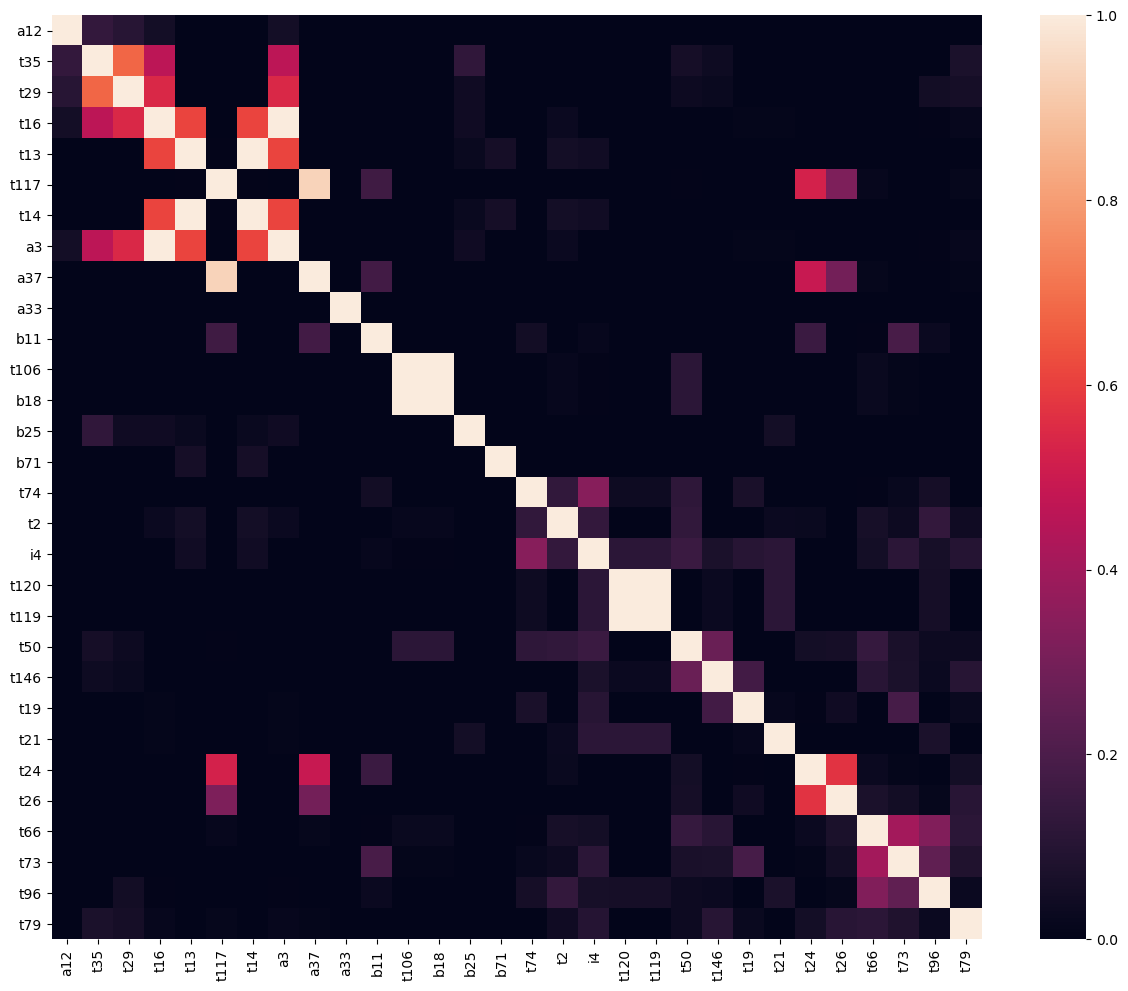

In [27]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(corr_sig)
plt.savefig("03f_parameter_correlation_best.png", bbox_inches="tight")

In [28]:
parameter_change = pd.read_csv("../01_inspect/01d_off_parameter_changes.csv")
parameter_change.index = parameter_change.id
for nc in range(15):
    paras = cl[cl[1]==nc][0].values
    edges = all_edges_pert
    for p in paras:
        edges = edges[edges[p]]
    print(nc, edges.shape[0], paras, parameter_change.loc[paras, "smirks"].values)
    # get only 10 examples per parameter, remove ".iloc[:10]" for all examples
    for i, e in edges.iloc[:10].iterrows():
        svg = drawing.create_perturbation_visualization(e)#, redraw=True)
        fig = sg.fromstring(svg)
        text = f"DDG(EXP)={e['DDG_Exp.']:.1f};DDG(OFF2)={e['DDG_OpenFF-2.0_converged']:.1f}"  
        label = sg.TextElement(300, 35, f'{text}', size=15, 
                   font='sans-serif', anchor='middle', color='black')
        fig.append(label) 
        img = fig.to_str().decode("utf-8")
        with open(f"03f_cluster_best_{nc}_{i}.svg", 'w') as file:
            file.write(img)

0 4 ['a12'] ['[#1:1]-[#6X3:2]-[#1:3]']
1 0 ['t35' 't29' 't16' 't13' 't117' 't14' 'a3' 'a37'] ['[#6X4;r3:1]-;@[#6X4;r3:2]-[#6X3;r6:3]:[#6X3;r6:4]'
 '[#1:1]-[#6X4;r3:2]-[#6X3:3]~[#6X3:4]'
 '[#6X4;r3:1]-[#6X4;r3:2]-[#6X4;r3:3]-[*:4]'
 '[*:1]-[#6X4:2]-[#6X4;r3:3]-[*:4]'
 '[#6X3:1]-@[#16X2,#16X1-1,#16X3+1:2]-@[#6X3,#7X2;r5:3]=@[#6,#7;r5:4]'
 '[*:1]-[#6X4:2]-[#6X4;r3:3]-[#6X4;r3:4]'
 '[*;r3:1]1~;@[*;r3:2]~;@[*;r3:3]1' '[#6X3:1]-[#16X2:2]-[#6X3:3]']
2 4 ['a33'] ['[*:1]~[#16X3$(*~[#8X1,#7X2]):2]~[*:3]']
3 70 ['b11'] ['[#6X3:1]-[#7X2:2]']
4 10 ['t106' 'b18'] ['[*:1]~[#6X3:2]-[#8X2:3]-[#1:4]' '[#6X3:1]-[#8X2H1:2]']
5 13 ['b25'] ['[#6X2:1]-[#6X4:2]']
6 6 ['b71'] ['[#6X4:1]-[#17:2]']
7 19 ['t74' 't2' 'i4'] ['[*:1]~[#7X3,#7X2-1:2]-!@[#6X3:3]~[*:4]'
 '[#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4]'
 '[*:1]~[#7X3$(*~[#6X3]):2](~[*:3])~[*:4]']
8 15 ['t120' 't119'] ['[#6X4:1]-[#16X4,#16X3+0:2]-[#6X4:3]~[#6X4:4]'
 '[#6X4:1]-[#16X4,#16X3+0:2]-[#6X4:3]-[#1:4]']
9 3 ['t50' 't146'] ['[*:1]-[#6X4:2]-[#7X4:3]-[*:4]'
 '[

In [29]:
order = [to_plot[to_plot["Parameter"]==p]["Parameter"].iloc[0] for p in cl[0]]

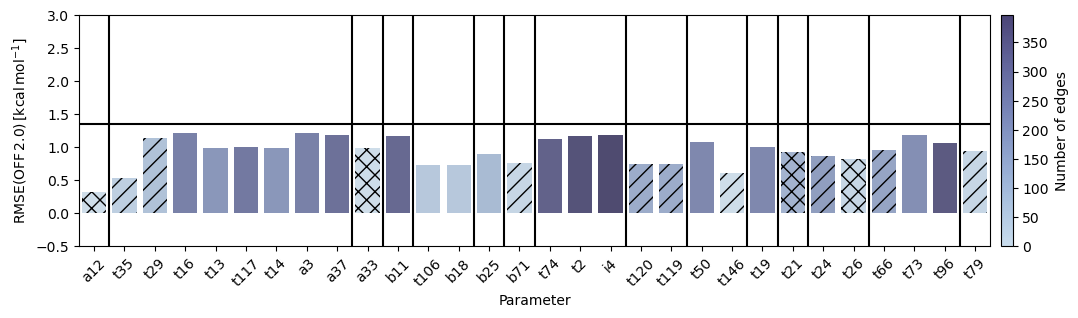

In [30]:
fig = plt.figure(figsize=(14,3))
norm = plt.Normalize(0, to_plot["size"].max())
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(start=.2, rot=-.2, dark=.3, as_cmap=True), norm=norm)
sm.set_array([])
bars = sns.barplot(x="Parameter", 
            y="RMSE", 
            data=to_plot, 
            hue="size", 
            palette="ch:start=.2,rot=-.2,dark=.3",
            order=order,
            hatch='',
           dodge=False)
ax = plt.gcf().get_axes()
ax[0].axhline(y=rmse_off2, color='k', zorder=-1)
c = 0
for i, (n, row) in enumerate(cl.iterrows()):
    if row[1] != c:
        ax[0].axvline(x=i-0.5, color='k', zorder=-2)
        c = row[1]
t = plt.xticks(rotation=45)
plt.ylim(-0.5,3)
plt.ylabel(r'$\mathrm{RMSE(OFF\,2.0)}\,[\mathrm{kcal\,mol^{-1}}]$')
for container in bars.containers:
    for i, (bar, para) in enumerate(zip(container, order)):
        # Set a different hatch for each bar
    #     print(para, to_plot.loc[to_plot["Parameter"]==para, "hatch"].values[0])
        bar.set_hatch(to_plot.loc[to_plot["Parameter"]==para, "hatch"].values[0])
plt.legend()
ax[0].get_legend().remove()
ax[0].figure.colorbar(sm, label="Number of edges", pad=0.01)
plt.savefig("03f_best_parameters.svg", bbox_inches="tight")